In [1]:
using GridPotentialFlow
using Plots
using LinearAlgebra

┌ Info: Precompiling GridPotentialFlow [1f0d46c9-1630-4f7c-9a63-ed825740f08c]
└ @ Base loading.jl:1260


#### Grid

In [2]:
Δx = 0.01
xlim = (-1,1)
ylim = (-1,1)
g = PhysicalGrid(xlim,ylim,Δx);

#### Circle

In [3]:
R = 0.5
circle = Circle(R,Δx)

Circular body with 314 points and radius 0.5
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


#### Flat plate

In [4]:
c = 1.0
plate = Plate(c,Δx)
T = RigidTransform((0.0,0.0),-π/6)
T(plate);

#### Vortices

In [5]:
v1 = Vortex(0.75,0.0,1.0);
v2 = Vortex(-0.75,0.0,1.0);
v3 = Vortex(plate.x[1]+3e-2*plate.len*cos(plate.α+π/2),plate.y[1]+3e-2*plate.len*sin(plate.α+π/2),1.0);
v4 = Vortex(plate.x[end]+3e-2*plate.len*cos(plate.α+π/2),plate.y[end]+3e-2*plate.len*sin(plate.α+π/2),1.0);

### 1) Steady unregularized flow around a body

In [6]:
model = VortexModel(g,bodies=circle)
ψ = computeψ(model,U∞=(1.0,1.0));

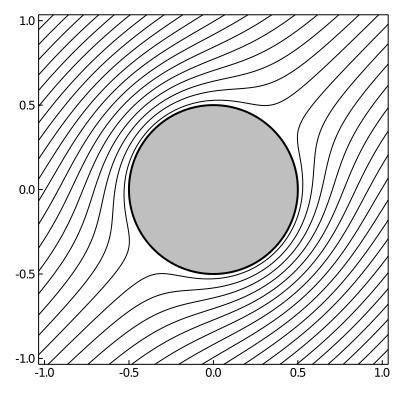

In [7]:
xg,yg = coordinates(ψ,g);
plot(circle,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])

### 2) Steady regularized flow around a body

In [8]:
model = VortexModel(g,bodies=plate,edges=[length(plate)])
ψ = computeψ(model,U∞=(1.0,0.0));

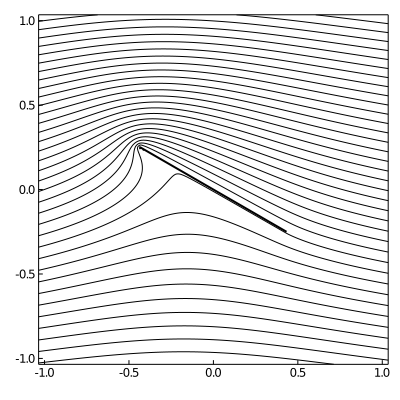

In [9]:
xg,yg = coordinates(ψ,g);
plot(plate,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])

### 3) Unsteady flow without a body

In [10]:
model = VortexModel(g,vortices=[v1,v2])
ψ = computeψ(model,U∞=(1.0,1.0));

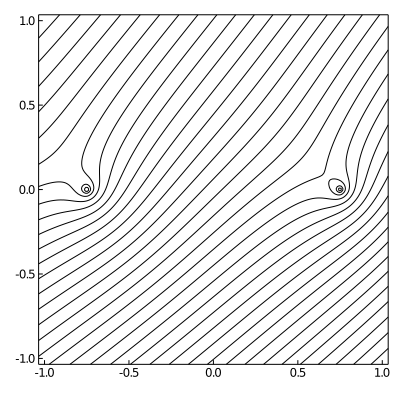

In [11]:
xg,yg = coordinates(ψ,g);
plot(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])

### 4) Unsteady unregularized flow around a body

In [12]:
model = VortexModel(g,vortices=[v1,v2],bodies=circle)
ψ = computeψ(model,U∞=(1.0,1.0));

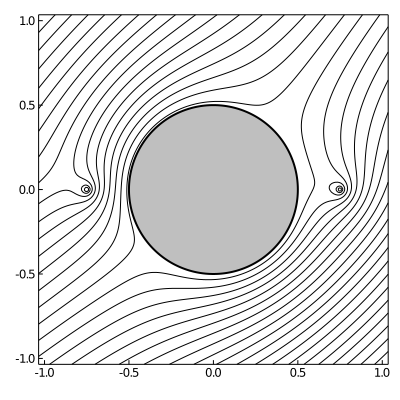

In [13]:
xg,yg = coordinates(ψ,g);
plot(circle,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])

### 5) Unsteady regularized flow around a body

In [14]:
model = VortexModel(g,vortices=[v3,v4],bodies=plate,edges=[1,length(plate)]);
ψ = computeψ(model,U∞=(1.0,0.0),σ=[(0,0),(0,0)]);

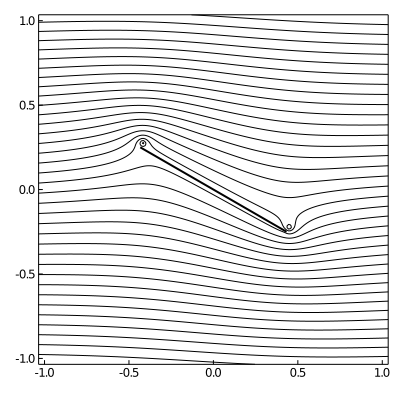

In [15]:
xg,yg = coordinates(ψ,g);
plot(plate,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])